In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline
#Importamos nuestros módulos y clases necesarias
import Image_Classifier as img_clf
import Labeled_Image as li
import classifiers as clfs

from skimage import io
from skimage.color import rgb2gray
from skimage.transform import rescale

import matplotlib.pyplot as plt

In [2]:
from IPython.display import display
import fileupload
import os
import PIL.Image
import io as io2
import numpy as np

# Inicializamos la clase que se encarga de clasificar imagenes 
clf = img_clf.Image_Classifier(clfs.classifiers.get('svm'))
lbl_img = li.Labeled_Image(clf)

''' Función que se encarga de aplicar las operaciones 
necesarias para convertir los datos obtenidos del FileUpload
en una imagen'''
def imageConverter(change):
        ch = change['owner']
        image = io2.BytesIO(ch.data)
        image = PIL.Image.open(image)
        image = np.array(image)
        return rgb2gray(image)

'''Función mediante la que indicamos el clasificador
con el que clasificaremos la imagen'''
def set_classifier_wrapper(classifier_index):
    clf.set_classifier(clfs.classifiers[classifier_index][0],
                       is_probs_classifier = clfs.classifiers[classifier_index][1])
    
'''Función que nos permite mostrar la imagen'''
def plotter_wrapper():
    lbl_img.boxes_generator_with_nms()
    lbl_img.plotter()

''' Función mediante la que escogemos la imagen'''
def _upload(lbl_img):

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        image = imageConverter(change)
        lbl_img.set_image(image)
        #lbl_img.predict()
        
    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)
    
'''Función que nos permite mostrar la imagen'''
def rescale_image_selector(lbl_img, rescale_coef):
    if lbl_img.get_original_image() is not None:
        lbl_img.image_rescale(rescale_coef)

def patch_size_selector(Ni, Nj):
    clf.set_patch_size((Ni,Nj))

clf_button = widgets.Button(description="Clasificar")

def on_button_clicked(b):
    # Etiquetamos imagen
    lbl_img.predict()
    # Y la mostramos
    plotter_wrapper()
    
#clf_button.on_click(on_button_clicked)#, clf)

def step_size_selector(istep, jstep):
    clf.set_istep(istep)
    clf.set_jstep(jstep)

def probabilities_selector(probs):
    lbl_img.set_probs(probs)
    lbl_img.predict()
    plotter_wrapper()

def alfa_selector(alfa):
    lbl_img.set_alfa(alfa)

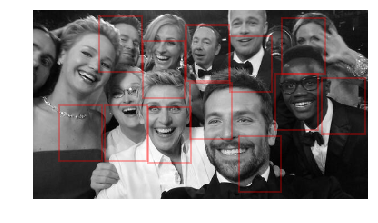

In [3]:

# Mostramos el widget que permita elegir el clasificador
interact(set_classifier_wrapper, classifier_index = list(clfs.classifiers.keys()));

# Mostramos el widget que permita elegir la imagen a clasificar
_upload(lbl_img)

# Permitimos escoger el rescalado de la imagen, por defecto 1
interact(rescale_image_selector, rescale_coef=(0.3,1,0.001), lbl_img=fixed(lbl_img))

# Permitimos escoger el tamaño de alto y ancho para
# las subdivisiones de la ventana
#interact(patch_size_selector, Ni=(0,100), Nj=(0,100))

# Permitimos escoger el tamaño del salto
# en las subdivisiones de la imagen
interact(step_size_selector, istep=(0,100), jstep=(0,100))

interact(alfa_selector, alfa=(0,1,0.001))

# Por ultimo, mostramos la imagen y permitimos que muestre las ventanas 
# en función de las probabilidades
interact_manual(probabilities_selector, probs=(0.5,1,0.001))

# LLamar al clasificador
#display(clf_button)